<a href="https://colab.research.google.com/github/Ebratul/Python/blob/main/NLP/NLP1_Duplicate_Question_Pairs_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [132]:
!pip install opendatasets

In [133]:
import opendatasets as od

In [134]:
od.download("https://www.kaggle.com/datasets/quora/question-pairs-dataset")

Skipping, found downloaded files in "./question-pairs-dataset" (use force=True to force download)


In [135]:
import pandas as pd
import numpy as np

In [136]:
df = pd.read_csv(r"/content/question-pairs-dataset/questions.csv")

In [137]:
df.head(5)

,id,qid1,qid2,question1,question2,is_duplicate
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0


In [138]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 404351 entries, 0 to 404350
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            404351 non-null  int64 
 1   qid1          404351 non-null  int64 
 2   qid2          404351 non-null  int64 
 3   question1     404350 non-null  object
 4   question2     404349 non-null  object
 5   is_duplicate  404351 non-null  int64 
dtypes: int64(4), object(2)
memory usage: 18.5+ MB


In [139]:
df.sample(10)

,id,qid1,qid2,question1,question2,is_duplicate
203110,203110,400758,400759,What is the scariest book you ever read?,Which are the scariest novel you have ever read?,1
44799,44799,89207,89208,How can I open DWG files in Adobe Illustrator?,What is the difference between 780p and 1080i ...,0
382652,382652,748306,542271,What are the health benefits of flax seeds?,What are the health benefits of adding of flax...,1
311292,311292,94619,611052,Is it possible to find out whether someone vot...,Why should I vote or not vote for Narendra Mod...,0
169928,169928,335795,100699,Who are the most beautiful female athletes?,What is the most beautiful number and why?,0
63810,63810,126892,126893,What are the property rates in Pune after demo...,Has Pune property rates come down after demone...,0
60190,60190,119723,119724,Why was Cyrus Mistry removed as the chairman o...,What made Tata group chairman Cyrus Mistry to ...,1
273147,273147,537152,537153,How will the ban of Rs 500 and Rs 1000 notes a...,What happens to counterfeit notes in the recen...,0
384169,384169,751207,751208,How is many-worlds considered a viable interpr...,How can we as everyday Americans help in endin...,0
151162,151162,299022,299023,What happened to Tamil actor Mohan in the 90s?,Is the Tamil actor Ajith Kumar overrated?,0


In [140]:
print(df.loc[238061, 'question1'])
#print(df['question1'].iloc[0])

How will banning Rs. 500 and Rs. 1000 notes help in overcoming corruption in India?


In [141]:
print(df.loc[238061, 'question2'])

How will replacing 1000 notes with 2000 notes going to stop corruption and black money?


In [142]:
df.isnull().sum()

,0
id,0
qid1,0
qid2,0
question1,1
question2,2
is_duplicate,0


In [143]:
df.duplicated().sum()

np.int64(0)

In [144]:
df['is_duplicate'].value_counts()

,count
is_duplicate,
0,255045
1,149306


In [145]:
df['is_duplicate'].count()

np.int64(404351)

<Axes: xlabel='is_duplicate'>

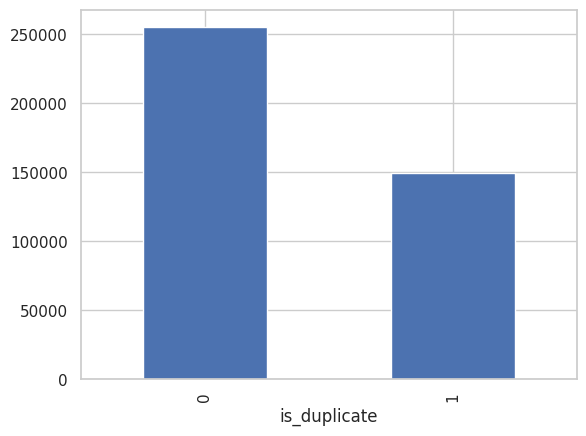

In [146]:
df['is_duplicate'].value_counts().plot(kind ='bar')
#plt.bar(x, y)

In [147]:
print("percentage(%)")
(df['is_duplicate'].value_counts() / df['is_duplicate'].count())*100

percentage(%)


,count
is_duplicate,
0,63.07515
1,36.92485


In [148]:
#unbalanced data

In [149]:
#repeated questions

qid = pd.Series(df['qid1'].tolist() + df['qid2'].tolist())
print('Number of unique questions ', np.unique(qid).shape[0])

Number of unique questions  789801


In [150]:
qid.value_counts().values

array([50, 47, 41, ...,  1,  1,  1])

In [151]:
x = qid.value_counts() > 1
print('number of question getting repeated', x[x].shape[0])

number of question getting repeated 13698


In [152]:
np.unique(qid).shape

(789801,)

In [153]:
x

,count
65333,True
7863,True
147324,True
2628,True
196396,True
...,...
530741,False
530743,False
530745,False
530747,False


In [154]:
x.value_counts()

,count
count,
False,776103
True,13698


<Axes: xlabel='count'>

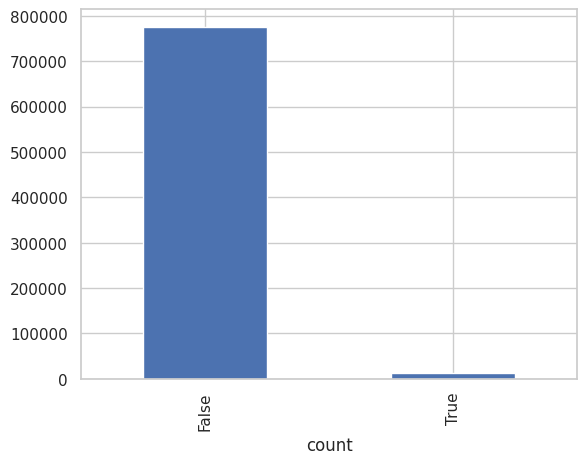

In [155]:
x.value_counts().plot(kind = 'bar')

In [156]:
x[x]

# x[x] মানে হলো:
# 👉 যে রো-গুলোতে x এর মান True, শুধু সেগুলোই রাখো।
# 👉 False থাকা রো গুলো বাদ দাও।

,count
65333,True
7863,True
147324,True
2628,True
196396,True
...,...
162499,True
109338,True
210212,True
113586,True


In [157]:
x[x].value_counts()

,count
count,
True,13698


In [158]:
x[~x]

,count
256089,False
265789,False
265822,False
255999,False
267907,False
...,...
530741,False
530743,False
530745,False
530747,False


In [159]:
import matplotlib.pyplot as plt

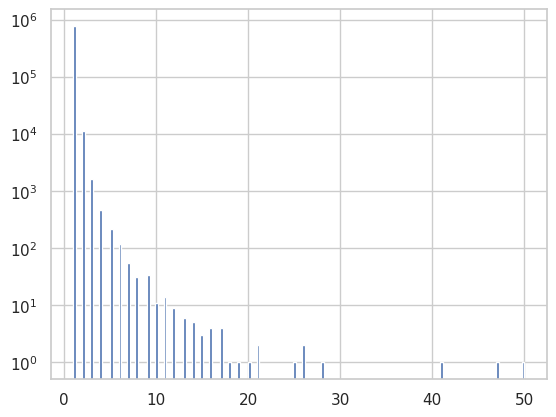

In [160]:
#repreated question histogram

plt.hist(qid.value_counts().values, bins =160)
plt.yscale('log')
plt.show()

In [161]:
qid.value_counts().max()

50

In [162]:
#incrimental learning => vacx, dask

In [163]:
df = df.sample(10000)

In [164]:
p_df = df

In [165]:
df.isnull().sum()

,0
id,0
qid1,0
qid2,0
question1,0
question2,0
is_duplicate,0


In [166]:
df.duplicated().sum()

np.int64(0)

In [167]:
q_df = df[['question1','question2']]
q_df

,question1,question2
9344,"I can't do push-ups, why?",Why can't I do push-ups?
10322,What is a secret which you would not tell anyb...,What is a secret which you would not tell anyb...
244200,What is an IT architect?,What does a c++ architect do?
93563,Are there examples of well-known excellent com...,Are there real life examples of people who are...
380765,What is the best way to prepare for the theore...,What is the best way to prepare for CA final l...
...,...,...
328229,Difference between HRM and International HRm?,How would you explain WiFi to your grandmother?
285822,What is the process to determine the density o...,What is the process to determine the density o...
41153,How has the pace of scientific progress during...,How has the pace of technological progress dur...
45297,How do I code an online Android ide?,What are some good online IDEs which support A...


In [168]:
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np

In [169]:
#marge text

question = list(q_df['question1']) +list(q_df['question2'])
# len(question)

In [170]:
cv = CountVectorizer(max_features=3000)

In [171]:
# val = cv.fit(question)
cv.fit_transform(question).toarray()
# np.vsplit(full_array, 2)

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [172]:
q1_arr, q2_arr = np.vsplit(cv.fit_transform(question).toarray(), 2)

In [173]:
temp_df1 = pd.DataFrame(q1_arr, index = q_df.index)
temp_df2 = pd.DataFrame(q2_arr, index = q_df.index)
temp_df = pd.concat([temp_df1, temp_df1], axis=1)
temp_df

,0,1,2,3,4,5,6,7,8,9,...,2990,2991,2992,2993,2994,2995,2996,2997,2998,2999
9344,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10322,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
244200,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
93563,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
380765,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
328229,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
285822,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41153,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
45297,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [174]:
temp_df1.shape

(10000, 3000)

In [175]:
temp_df.shape

(10000, 6000)

In [176]:
temp_df['is_duplicate'] = df['is_duplicate']
temp_df

,0,1,2,3,4,5,6,7,8,9,...,2991,2992,2993,2994,2995,2996,2997,2998,2999,is_duplicate
9344,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
10322,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
244200,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
93563,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
380765,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
328229,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
285822,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41153,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
45297,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [177]:
x = temp_df.iloc[:,0:-1]
y = temp_df.iloc[:,-1]
y

,is_duplicate
9344,1
10322,1
244200,0
93563,0
380765,1
...,...
328229,0
285822,0
41153,0
45297,0


In [178]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, random_state = 42)

In [179]:
# temp_df.iloc[:,0:-1].values

In [180]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score


# rf = RandomForestClassifier(n_estimators=500, criterion = 'entropy', max_depth =500)
rf = RandomForestClassifier()
rf.fit(x_train, y_train)

RandomForestClassifier()

In [181]:
y_pred = rf.predict(x_test)
accuracy_score(y_test, y_pred)

0.7012

In [182]:
from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb.fit(x_train.to_numpy(), y_train.to_numpy())

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, ...)

In [183]:
y_pred = xgb.predict(x_test.to_numpy())
accuracy_score(y_test.to_numpy(), y_pred)

0.7092

#Feature Engineering

In [184]:
df['q1_len'] = df['question1'].str.len()
df['q2_len'] = df['question2'].str.len()

In [185]:
df.head(5)

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len
9344,9344,18661,18662,"I can't do push-ups, why?",Why can't I do push-ups?,1,25,24
10322,10322,20611,20612,What is a secret which you would not tell anyb...,What is a secret which you would not tell anyb...,1,63,99
244200,244200,480935,480936,What is an IT architect?,What does a c++ architect do?,0,24,29
93563,93563,185748,185749,Are there examples of well-known excellent com...,Are there real life examples of people who are...,0,190,144
380765,380765,744685,744686,What is the best way to prepare for the theore...,What is the best way to prepare for CA final l...,1,78,59


In [186]:
#num of word
df['q1_num_word'] = df['question1'].apply(lambda x: len(x.split(" ")))
df['q2_num_word'] = df['question2'].apply(lambda x: len(x.split(" ")))

In [187]:
df.head(5)

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_num_word,q2_num_word
9344,9344,18661,18662,"I can't do push-ups, why?",Why can't I do push-ups?,1,25,24,5,5
10322,10322,20611,20612,What is a secret which you would not tell anyb...,What is a secret which you would not tell anyb...,1,63,99,13,19
244200,244200,480935,480936,What is an IT architect?,What does a c++ architect do?,0,24,29,5,6
93563,93563,185748,185749,Are there examples of well-known excellent com...,Are there real life examples of people who are...,0,190,144,27,25
380765,380765,744685,744686,What is the best way to prepare for the theore...,What is the best way to prepare for CA final l...,1,78,59,16,13


In [188]:
[set(map(lambda x: x.lower().strip(), "What is is Elon Elon Musk's vision of Tesla Motors?".split(" ")))]

[{'elon', 'is', 'motors?', "musk's", 'of', 'tesla', 'vision', 'what'}]

In [189]:
"       What is is Elon Elon Musk's vision of Tesla Motors?          ".lower().strip()

"what is is elon elon musk's vision of tesla motors?"

In [190]:
#common word
def common_word(row):
  w1 = set(map(lambda x: x.lower().strip(), row['question1'].split(" ")))
  w2 = set(map(lambda x: x.lower().strip(), row['question2'].split(" ")))
  return len(w1 & w2)

In [191]:
df['word_common'] = df.apply(common_word, axis = 1)
df

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_num_word,q2_num_word,word_common
9344,9344,18661,18662,"I can't do push-ups, why?",Why can't I do push-ups?,1,25,24,5,5,3
10322,10322,20611,20612,What is a secret which you would not tell anyb...,What is a secret which you would not tell anyb...,1,63,99,13,19,12
244200,244200,480935,480936,What is an IT architect?,What does a c++ architect do?,0,24,29,5,6,1
93563,93563,185748,185749,Are there examples of well-known excellent com...,Are there real life examples of people who are...,0,190,144,27,25,7
380765,380765,744685,744686,What is the best way to prepare for the theore...,What is the best way to prepare for CA final l...,1,78,59,16,13,10
...,...,...,...,...,...,...,...,...,...,...,...
328229,328229,643738,643739,Difference between HRM and International HRm?,How would you explain WiFi to your grandmother?,0,45,47,6,8,0
285822,285822,561725,561726,What is the process to determine the density o...,What is the process to determine the density o...,0,87,83,15,15,13
41153,41153,81971,81972,How has the pace of scientific progress during...,How has the pace of technological progress dur...,0,138,155,21,22,13
45297,45297,90200,90201,How do I code an online Android ide?,What are some good online IDEs which support A...,0,36,65,8,10,2


In [192]:
#total word

def total_words(row):
  w1 = set(map(lambda x: x.lower().strip(), row['question1'].split(" ")))
  w2 = set(map(lambda x: x.lower().strip(), row['question2'].split(" ")))
  return (len(w1) + len(w2))

In [193]:
df['word_total'] = df.apply(total_words,  axis = 1)

In [194]:
df['word_share'] = round(df['word_common'] / df['word_total'], 2)

In [195]:
# analysis of feature
import seaborn as sb

minimum charactes 1
maximum charactes 430
avg n um of charactes 59.3276


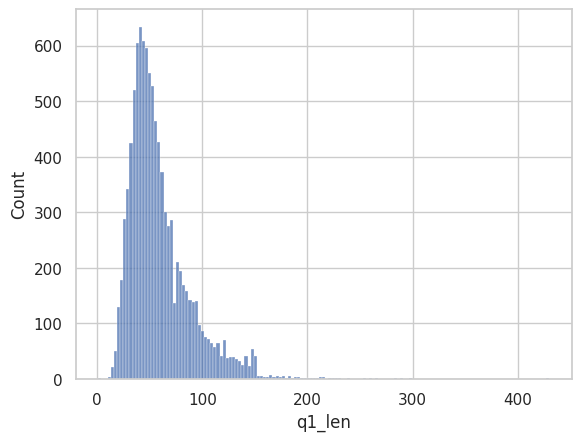

In [196]:
#EDA
sb.histplot(df['q1_len'])
print('minimum charactes', df['q1_len'].min())
print('maximum charactes', df['q1_len'].max())
print('avg n um of charactes', (df['q1_len'].mean()))

minimum charactes 4
maximum charactes 338
avg n um of charactes 60.284


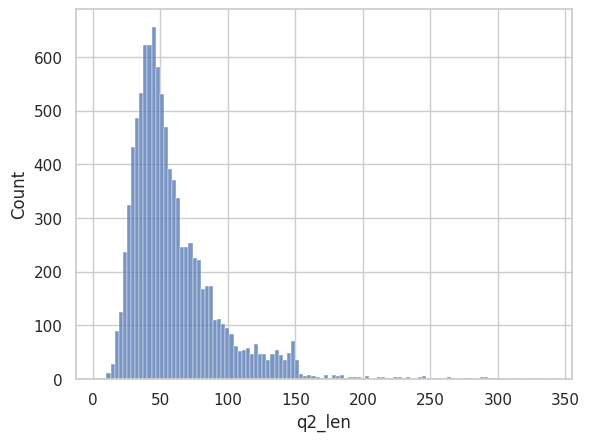

In [197]:
#EDA
sb.histplot(df['q2_len'])
print('minimum charactes', df['q2_len'].min())
print('maximum charactes', df['q2_len'].max())
print('avg n um of charactes', (df['q2_len'].mean()))

minimum charactes 1
maximum charactes 81
avg n um of charactes 10.8991


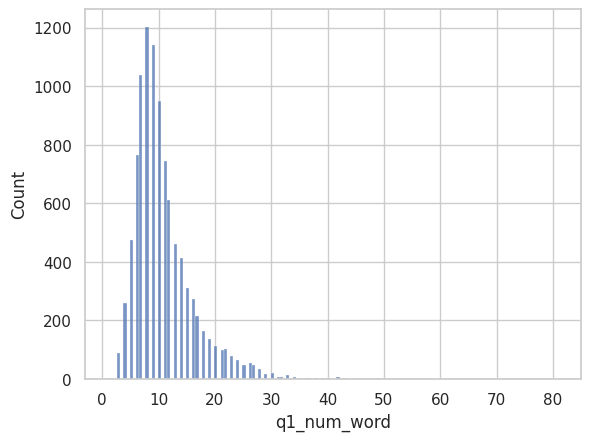

In [198]:
#EDA
sb.histplot(df['q1_num_word'])
print('minimum charactes', df['q1_num_word'].min())
print('maximum charactes', df['q1_num_word'].max())
print('avg n um of charactes', (df['q1_num_word'].mean()))

minimum charactes 1
maximum charactes 66
avg n um of charactes 11.2203


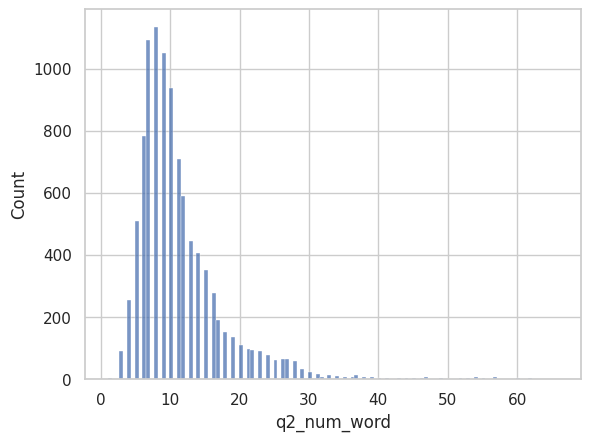

In [199]:
#EDA
sb.histplot(df['q2_num_word'])
print('minimum charactes', df['q2_num_word'].min())
print('maximum charactes', df['q2_num_word'].max())
print('avg n um of charactes', (df['q2_num_word'].mean()))

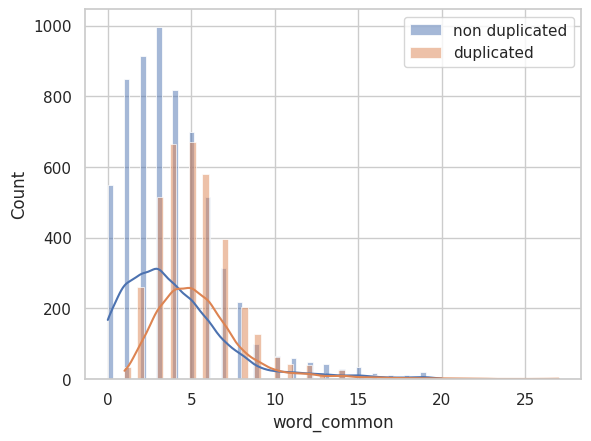

In [200]:
#common word
#EDA
sb.histplot(df[df['is_duplicate'] == 0]['word_common'], label = 'non duplicated',kde= True)
sb.histplot(df[df['is_duplicate'] == 1]['word_common'], label = 'duplicated', kde = True)
plt.legend()
plt.show()


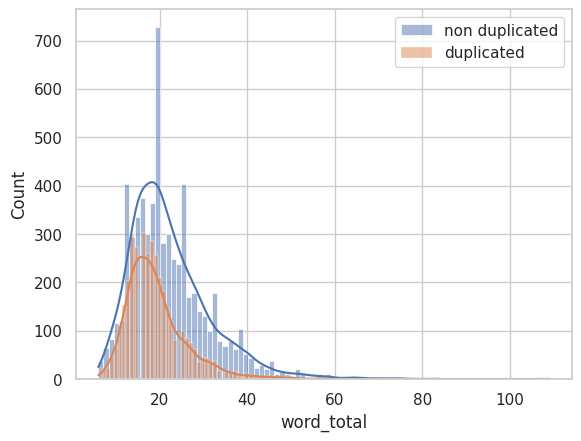

In [201]:
#total word
#EDA
sb.histplot(df[df['is_duplicate'] == 0]['word_total'], label = 'non duplicated',kde= True)
sb.histplot(df[df['is_duplicate'] == 1]['word_total'], label = 'duplicated', kde = True)
plt.legend()
plt.show()

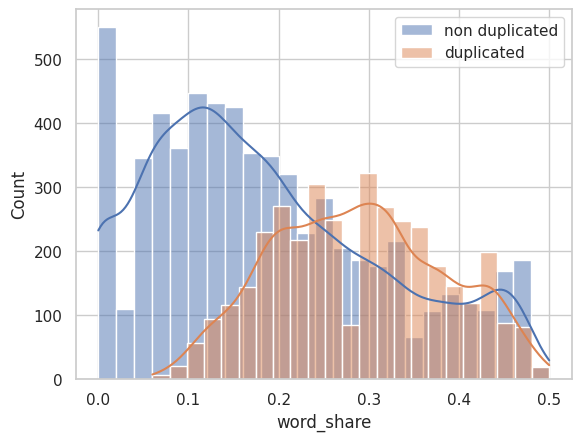

In [202]:
#total share
#EDA
sb.histplot(df[df['is_duplicate'] == 0]['word_share'], label = 'non duplicated',kde= True)
sb.histplot(df[df['is_duplicate'] == 1]['word_share'], label = 'duplicated', kde = True)
plt.legend()
plt.show()

In [203]:
qq_df = df[['question1', 'question2']]
qq_df

,question1,question2
9344,"I can't do push-ups, why?",Why can't I do push-ups?
10322,What is a secret which you would not tell anyb...,What is a secret which you would not tell anyb...
244200,What is an IT architect?,What does a c++ architect do?
93563,Are there examples of well-known excellent com...,Are there real life examples of people who are...
380765,What is the best way to prepare for the theore...,What is the best way to prepare for CA final l...
...,...,...
328229,Difference between HRM and International HRm?,How would you explain WiFi to your grandmother?
285822,What is the process to determine the density o...,What is the process to determine the density o...
41153,How has the pace of scientific progress during...,How has the pace of technological progress dur...
45297,How do I code an online Android ide?,What are some good online IDEs which support A...


In [204]:
f_df = df.drop(columns = ['id', 'qid1', 'qid2', 'question1', 'question2'])

In [205]:
f_df

,is_duplicate,q1_len,q2_len,q1_num_word,q2_num_word,word_common,word_total,word_share
9344,1,25,24,5,5,3,10,0.30
10322,1,63,99,13,19,12,31,0.39
244200,0,24,29,5,6,1,11,0.09
93563,0,190,144,27,25,7,49,0.14
380765,1,78,59,16,13,10,27,0.37
...,...,...,...,...,...,...,...,...
328229,0,45,47,6,8,0,14,0.00
285822,0,87,83,15,15,13,28,0.46
41153,0,138,155,21,22,13,28,0.46
45297,0,36,65,8,10,2,18,0.11


In [206]:
from sklearn.feature_extraction.text import CountVectorizer

questions = list(df['question1']) + list(df['question2'])
cv = CountVectorizer(max_features=3000)
q1_arr, q2_arr = np.vsplit(cv.fit_transform(questions).toarray(), 2)

In [207]:
cv.fit_transform(questions).toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [208]:
temp_df1 = pd.DataFrame(q1_arr, index = qq_df.index)
temp_df2 = pd.DataFrame(q2_arr, index = qq_df.index)
temp_df = pd.concat([temp_df1, temp_df2], axis = 1)
temp_df.shape

(10000, 6000)

In [209]:
d_df = pd.concat([f_df, temp_df], axis = 1)
d_df.shape

(10000, 6008)

In [210]:
d_df

,is_duplicate,q1_len,q2_len,q1_num_word,q2_num_word,word_common,word_total,word_share,0,1,...,2990,2991,2992,2993,2994,2995,2996,2997,2998,2999
9344,1,25,24,5,5,3,10,0.30,0,0,...,0,0,0,0,0,0,0,0,0,0
10322,1,63,99,13,19,12,31,0.39,0,0,...,0,1,0,0,0,0,0,0,0,0
244200,0,24,29,5,6,1,11,0.09,0,0,...,0,0,0,0,0,0,0,0,0,0
93563,0,190,144,27,25,7,49,0.14,0,0,...,0,0,0,0,0,0,0,0,0,0
380765,1,78,59,16,13,10,27,0.37,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
328229,0,45,47,6,8,0,14,0.00,0,0,...,0,1,0,0,1,0,0,0,0,0
285822,0,87,83,15,15,13,28,0.46,0,0,...,0,0,0,0,0,0,0,0,0,0
41153,0,138,155,21,22,13,28,0.46,0,0,...,0,0,0,0,0,0,0,0,0,0
45297,0,36,65,8,10,2,18,0.11,0,0,...,0,0,0,0,0,0,0,0,0,0


In [211]:
x = d_df.iloc[:,1::]
y = d_df.iloc[:,0]

In [212]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state= 42)

In [213]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
rf = RandomForestClassifier()
rf.fit(x_train.values, y_train.values)


RandomForestClassifier()

In [214]:
y_pred = rf.predict(x_test.values)
accuracy_score(y_test.values, y_pred)

0.752

In [215]:
from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb.fit(x_train.values, y_train.values)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, ...)

In [216]:
y_pred = xgb.predict(x_test.values)
accuracy_score(y_test.values, y_pred)

0.7668

In [217]:
#Advanced Feature
# token feature
# length based feature
# fuzzy feature

In [218]:
replacements = {
        '%': ' percent ',
        '$': ' dollar ',
        '₹': ' rupee ',
        '€': ' euro ',
        '@': ' at ',
        '&': ' and ',
        '+': ' plus ',
    }
replacements.items()

dict_items([('%', ' percent '), ('$', ' dollar '), ('₹', ' rupee '), ('€', ' euro '), ('@', ' at '), ('&', ' and '), ('+', ' plus ')])

In [219]:
import string
from bs4 import BeautifulSoup
import re

In [220]:
import re
import string
from bs4 import BeautifulSoup

def preprocess(q):
    # convert into string, lowercase and trim
    q = str(q).lower().strip()

    # Replace some symbols with word equivalents
    replacements = {
        '%': ' percent ',
        '$': ' dollar ',
        '₹': ' rupee ',
        '€': ' euro ',
        '@': ' at ',
        '&': ' and ',
        '+': ' plus ',
    }
    for k, v in replacements.items():
        q = q.replace(k, v)

    # Remove special tag [math]
    q = q.replace('[math]', '')

    # Replace large numeric patterns
    q = re.sub(r'([0-9]+)000000000', r'\1b', q)  # billion
    q = re.sub(r'([0-9]+)000000', r'\1m', q)      # million
    q = re.sub(r'([0-9]+)000', r'\1k', q)         # thousand

    # Expand common English contractions
    contractions = {
    # Common negative contractions
    "aren't": "are not",
    "can't": "cannot",
    "can't've": "cannot have",
    "could've": "could have",
    "couldn't": "could not",
    "couldn't've": "could not have",
    "didn't": "did not",
    "doesn't": "does not",
    "don't": "do not",
    "hadn't": "had not",
    "hadn't've": "had not have",
    "hasn't": "has not",
    "haven't": "have not",
    "isn't": "is not",
    "mustn't": "must not",
    "mightn't": "might not",
    "might've": "might have",
    "must've": "must have",
    "needn't": "need not",
    "shan't": "shall not",
    "should've": "should have",
    "shouldn't": "should not",
    "shouldn't've": "should not have",
    "wasn't": "was not",
    "weren't": "were not",
    "won't": "will not",
    "would've": "would have",
    "wouldn't": "would not",
    "wouldn't've": "would not have",
    "ain't": "is not",

    # Pronoun contractions
    "i'm": "i am",
    "i'd": "i would",
    "i've": "i have",
    "i'll": "i will",
    "you're": "you are",
    "you'd": "you would",
    "you've": "you have",
    "you'll": "you will",
    "he's": "he is",
    "he'd": "he would",
    "he'll": "he will",
    "she's": "she is",
    "she'd": "she would",
    "she'll": "she will",
    "they're": "they are",
    "they'd": "they would",
    "they've": "they have",
    "they'll": "they will",
    "we're": "we are",
    "we'd": "we would",
    "we've": "we have",
    "we'll": "we will",

    # Verb + not with short forms
    "daren't": "dare not",
    "needn't": "need not",
    "oughtn't": "ought not",

    # Modal/Helping verb contractions
    "let's": "let us",
    "here's": "here is",
    "there's": "there is",
    "that's": "that is",
    "what's": "what is",
    "who's": "who is",
    "where's": "where is",
    "when's": "when is",
    "why's": "why is",
    "how's": "how is",

    # Informal / slang contractions
    "y'all": "you all",
    "innit": "is it not",
    "gonna": "going to",
    "wanna": "want to",
    "gotta": "got to",
    "kinda": "kind of",
    "sorta": "sort of",
    "lemme": "let me",
    "gimme": "give me",
    "ain't": "is not"
}

    for c, v in contractions.items():
        q = q.replace(c, v)

    # Expanding remaining "'t", "'ve", "'re", "'ll"
    q = q.replace("n't", " not")
    q = q.replace("'ve", " have")
    q = q.replace("'re", " are")
    q = q.replace("'ll", " will")

    # Removing HTML
    q = BeautifulSoup(q, "html.parser").get_text()

    # Remove punctuation
    q = q.translate(str.maketrans('', '', string.punctuation))

    # Remove extra whitespace
    q = re.sub(r'\s+', ' ', q).strip()

    return q


In [221]:
test = "Hello!!! <b>I'm</b> 1000000% sure &amp; I can't do this!"
print(preprocess(test))

hello i am 1m percent sure and amp i cannot do this


In [222]:
BeautifulSoup("<b>I'm</b>", "html.parser").get_text()

"I'm"

In [223]:
p_df['question1'] = p_df['question1'].apply(preprocess)
p_df['question2'] = p_df['question2'].apply(preprocess)

In [224]:
p_df

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_num_word,q2_num_word,word_common,word_total,word_share
9344,9344,18661,18662,i cannot do pushups why,why cannot i do pushups,1,25,24,5,5,3,10,0.30
10322,10322,20611,20612,what is a secret which you would not tell anyb...,what is a secret which you would not tell anyb...,1,63,99,13,19,12,31,0.39
244200,244200,480935,480936,what is an it architect,what does a c plus plus architect do,0,24,29,5,6,1,11,0.09
93563,93563,185748,185749,are there examples of wellknown excellent comm...,are there real life examples of people who are...,0,190,144,27,25,7,49,0.14
380765,380765,744685,744686,what is the best way to prepare for the theore...,what is the best way to prepare for ca final l...,1,78,59,16,13,10,27,0.37
...,...,...,...,...,...,...,...,...,...,...,...,...,...
328229,328229,643738,643739,difference between hrm and international hrm,how would you explain wifi to your grandmother,0,45,47,6,8,0,14,0.00
285822,285822,561725,561726,what is the process to determine the density o...,what is the process to determine the density o...,0,87,83,15,15,13,28,0.46
41153,41153,81971,81972,how has the pace of scientific progress during...,how has the pace of technological progress dur...,0,138,155,21,22,13,28,0.46
45297,45297,90200,90201,how do i code an online android ide,what are some good online ides which support a...,0,36,65,8,10,2,18,0.11


In [225]:
p_df['q1_len'] = p_df['question1'].str.len()
p_df['q2_len'] = p_df['question2'].str.len()

In [226]:
p_df['q1_num_words'] = p_df['question1'].apply(lambda x: len(x.split(" ")))
p_df['q2_num_words'] = p_df['question2'].apply(lambda x: len(x.split(" ")))

In [227]:
def common_words(df):
  w1 = set(map(lambda word: word.lower().strip(), df['question1'].split(" ")))
  w2 = set(map(lambda word: word.lower().strip(), df['question2'].split(" ")))
  return len(w1 & w2)

In [228]:
p_df['word_common'] = p_df.apply(common_words, axis=1)

In [229]:
def total_word(df):
  w1 = set(map(lambda word: word.lower().strip(), df['question1'].split(" ")))
  w2 = set(map(lambda word: word.lower().strip(), df['question2'].split(" ")))
  return len(w1) + len(w2)

In [230]:
p_df['word_total'] = p_df.apply(total_word, axis=1)

In [231]:
p_df['word_share'] = round(p_df['word_common'] / p_df['word_total'] , 2)
p_df.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_num_word,q2_num_word,word_common,word_total,word_share,q1_num_words,q2_num_words
9344,9344,18661,18662,i cannot do pushups why,why cannot i do pushups,1,23,23,5,5,5,10,0.50,5,5
10322,10322,20611,20612,what is a secret which you would not tell anyb...,what is a secret which you would not tell anyb...,1,62,97,13,19,13,31,0.42,13,19
244200,244200,480935,480936,what is an it architect,what does a c plus plus architect do,0,23,36,5,6,2,12,0.17,5,8
93563,93563,185748,185749,are there examples of wellknown excellent comm...,are there real life examples of people who are...,0,185,142,27,25,8,49,0.16,27,25
380765,380765,744685,744686,what is the best way to prepare for the theore...,what is the best way to prepare for ca final l...,1,77,58,16,13,10,27,0.37,16,13


In [232]:
# Advanced Feature

from nltk.corpus import stopwords

In [233]:
from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')

def fetch_tokens_features(row):
    q1 = row['question1']
    q2 = row['question2']

    SAFE_DIV = 0.0001
    stop_words = stopwords.words('english')
    token_feature = [0.0] * 8

    # Convert sentences into tokens
    q1_tokens = q1.split()
    q2_tokens = q2.split()

    if len(q1_tokens) == 0 or len(q2_tokens) == 0:
        return token_feature

    # Non-stopwords
    q1_word  = set([word for word in q1_tokens if word not in stop_words])
    q2_word  = set([word for word in q2_tokens if word not in stop_words])

    # Stopwords
    q1_stop = set([word for word in q1_tokens if word in stop_words])
    q2_stop = set([word for word in q2_tokens if word in stop_words])

    # Common counts
    common_word_count = len(q1_word.intersection(q2_word))
    common_stop_count = len(q1_stop.intersection(q2_stop))
    common_token_count = len(set(q1_tokens).intersection(set(q2_tokens)))

    # Features
    token_feature[0] = common_word_count / (min(len(q1_word), len(q2_word)) + SAFE_DIV)
    token_feature[1] = common_word_count / (max(len(q1_word), len(q2_word)) + SAFE_DIV)
    token_feature[2] = common_stop_count / (min(len(q1_stop), len(q2_stop)) + SAFE_DIV)
    token_feature[3] = common_stop_count / (max(len(q1_stop), len(q2_stop)) + SAFE_DIV)
    token_feature[4] = common_token_count / (min(len(q1_tokens), len(q2_tokens)) + SAFE_DIV)
    token_feature[5] = common_token_count / (max(len(q1_tokens), len(q2_tokens)) + SAFE_DIV)

    # First and last word match
    token_feature[6] = int(q1_tokens[-1] == q2_tokens[-1])
    token_feature[7] = int(q1_tokens[0] == q2_tokens[0])

    return token_feature


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [234]:
token_feature = p_df.apply(fetch_tokens_features, axis = 1)


p_df['cwc_min'] = list(map(lambda x:x[0], token_feature))
p_df['cwc_max'] = list(map(lambda x:x[1], token_feature))
p_df['csc_min'] = list(map(lambda x:x[2], token_feature))
p_df['csc_max'] = list(map(lambda x:x[3], token_feature))
p_df['ctc_min'] = list(map(lambda x:x[4], token_feature))
p_df['ctc_max'] = list(map(lambda x:x[5], token_feature))
p_df['last_word_eq'] = list(map(lambda x:x[6], token_feature))
p_df['first_word_eq'] = list(map(lambda x:x[7], token_feature))


In [235]:
p_df

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_num_word,q2_num_word,...,q1_num_words,q2_num_words,cwc_min,cwc_max,csc_min,csc_max,ctc_min,ctc_max,last_word_eq,first_word_eq
9344,9344,18661,18662,i cannot do pushups why,why cannot i do pushups,1,23,23,5,5,...,5,5,0.999950,0.999950,0.999967,0.999967,0.999980,0.999980,0,0
10322,10322,20611,20612,what is a secret which you would not tell anyb...,what is a secret which you would not tell anyb...,1,62,97,13,19,...,13,19,0.999983,0.666659,0.999986,0.777769,0.999992,0.684207,0,1
244200,244200,480935,480936,what is an it architect,what does a c plus plus architect do,0,23,36,5,6,...,5,8,0.999900,0.333322,0.249994,0.249994,0.399992,0.249997,0,1
93563,93563,185748,185749,are there examples of wellknown excellent comm...,are there real life examples of people who are...,0,185,142,27,25,...,27,25,0.214284,0.214284,0.499995,0.454541,0.319999,0.296295,0,1
380765,380765,744685,744686,what is the best way to prepare for the theore...,what is the best way to prepare for ca final l...,1,77,58,16,13,...,16,13,0.714276,0.624992,0.833319,0.833319,0.769225,0.624996,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
328229,328229,643738,643739,difference between hrm and international hrm,how would you explain wifi to your grandmother,0,44,46,6,8,...,6,8,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,0
285822,285822,561725,561726,what is the process to determine the density o...,what is the process to determine the density o...,0,86,82,15,15,...,15,15,0.833319,0.833319,0.999988,0.999988,0.866661,0.866661,1,1
41153,41153,81971,81972,how has the pace of scientific progress during...,how has the pace of technological progress dur...,0,137,154,21,22,...,21,22,0.857131,0.857131,0.999983,0.999983,0.571426,0.545452,1,1
45297,45297,90200,90201,how do i code an online android ide,what are some good online ides which support a...,0,35,64,8,10,...,8,10,0.499988,0.333328,0.000000,0.000000,0.249997,0.199998,0,0


#Length Based feature

In [236]:
from nltk.metrics import distance

In [237]:
def longest_common_substring(s1, s2):
    max_len = 0
    for i in range(len(s1)):
        for j in range(len(s2)):
            length = 0
            while i + length < len(s1) and j + length < len(s2) and s1[i + length] == s2[j + length]:
                length += 1
            max_len = max(max_len, length)
    return max_len


In [238]:
def fetch_length_features(row):
    q1 = str(row['question1'])
    q2 = str(row['question2'])

    length_features = [0.0]*3

    q1_tokens = q1.split()
    q2_tokens = q2.split()

    if len(q1_tokens) == 0 or len(q2_tokens) == 0:
        return length_features

    # Absolute length difference
    length_features[0] = abs(len(q1_tokens) - len(q2_tokens))

    # Average token length
    length_features[1] = (len(q1_tokens) + len(q2_tokens)) / 2

    # Longest common substring ratio
    lcs_len = longest_common_substring(q1, q2)
    length_features[2] = lcs_len / (min(len(q1), len(q2)) + 1)

    return length_features


In [239]:
length_feature = p_df.apply(fetch_length_features, axis = 1)

In [240]:
length_feature

,0
9344,"[0, 5.0, 0.4583333333333333]"
10322,"[6, 16.0, 0.9841269841269841]"
244200,"[3, 6.5, 0.4166666666666667]"
93563,"[2, 26.0, 0.0979020979020979]"
380765,"[3, 14.5, 0.6101694915254238]"
...,...
328229,"[2, 7.0, 0.06666666666666667]"
285822,"[0, 15.0, 0.8433734939759037]"
41153,"[1, 21.5, 0.4927536231884058]"
45297,"[2, 9.0, 0.25]"


In [241]:
p_df['abs_len_diff'] = list(map(lambda x:x[0], length_feature))
p_df['mean_len'] = list(map(lambda x:x[1], length_feature))
p_df['longest_substr_ratio'] = list(map(lambda x:x[2], length_feature))

In [242]:
p_df

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_num_word,q2_num_word,...,cwc_max,csc_min,csc_max,ctc_min,ctc_max,last_word_eq,first_word_eq,abs_len_diff,mean_len,longest_substr_ratio
9344,9344,18661,18662,i cannot do pushups why,why cannot i do pushups,1,23,23,5,5,...,0.999950,0.999967,0.999967,0.999980,0.999980,0,0,0,5.0,0.458333
10322,10322,20611,20612,what is a secret which you would not tell anyb...,what is a secret which you would not tell anyb...,1,62,97,13,19,...,0.666659,0.999986,0.777769,0.999992,0.684207,0,1,6,16.0,0.984127
244200,244200,480935,480936,what is an it architect,what does a c plus plus architect do,0,23,36,5,6,...,0.333322,0.249994,0.249994,0.399992,0.249997,0,1,3,6.5,0.416667
93563,93563,185748,185749,are there examples of wellknown excellent comm...,are there real life examples of people who are...,0,185,142,27,25,...,0.214284,0.499995,0.454541,0.319999,0.296295,0,1,2,26.0,0.097902
380765,380765,744685,744686,what is the best way to prepare for the theore...,what is the best way to prepare for ca final l...,1,77,58,16,13,...,0.624992,0.833319,0.833319,0.769225,0.624996,0,1,3,14.5,0.610169
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
328229,328229,643738,643739,difference between hrm and international hrm,how would you explain wifi to your grandmother,0,44,46,6,8,...,0.000000,0.000000,0.000000,0.000000,0.000000,0,0,2,7.0,0.066667
285822,285822,561725,561726,what is the process to determine the density o...,what is the process to determine the density o...,0,86,82,15,15,...,0.833319,0.999988,0.999988,0.866661,0.866661,1,1,0,15.0,0.843373
41153,41153,81971,81972,how has the pace of scientific progress during...,how has the pace of technological progress dur...,0,137,154,21,22,...,0.857131,0.999983,0.999983,0.571426,0.545452,1,1,1,21.5,0.492754
45297,45297,90200,90201,how do i code an online android ide,what are some good online ides which support a...,0,35,64,8,10,...,0.333328,0.000000,0.000000,0.249997,0.199998,0,0,2,9.0,0.250000


In [243]:
!pip install fuzzywuzzy

In [244]:
from fuzzywuzzy import fuzz

In [245]:
def fetch_fuzzy_feature(row):
    q1 = row['question1']
    q2 = row['question2']

    fuzzy_feature = [0.0]*4

    # fuzz_ratio
    fuzzy_feature[0] = fuzz.QRatio(q1, q2)

    # fuzz_partial_ratio
    fuzzy_feature[1] = fuzz.partial_ratio(q1, q2)

    # token_sort_ratio
    fuzzy_feature[2] = fuzz.token_sort_ratio(q1, q2)

    # token_set_ratio
    fuzzy_feature[3] = fuzz.token_set_ratio(q1, q2)

    return fuzzy_feature



In [246]:
# Apply function to DataFrame
fuzzy_feature = p_df.apply(fetch_fuzzy_feature, axis=1)

In [247]:
p_df['fuzz_ratio'] = list(map(lambda x:x[0], fuzzy_feature))
p_df['fuzz_partial_ratio'] = list(map(lambda x:x[1], fuzzy_feature))
p_df['token_sort_ratio'] = list(map(lambda x: x[2], fuzzy_feature))
p_df['token_set_ratio'] = list(map(lambda x:x[3], fuzzy_feature))

In [248]:
p_df.shape

(10000, 30)

In [249]:
p_df.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_num_word,q2_num_word,...,ctc_max,last_word_eq,first_word_eq,abs_len_diff,mean_len,longest_substr_ratio,fuzz_ratio,fuzz_partial_ratio,token_sort_ratio,token_set_ratio
9344,9344,18661,18662,i cannot do pushups why,why cannot i do pushups,1,23,23,5,5,...,0.999980,0,0,0,5.0,0.458333,78,82,100,100
10322,10322,20611,20612,what is a secret which you would not tell anyb...,what is a secret which you would not tell anyb...,1,62,97,13,19,...,0.684207,0,1,6,16.0,0.984127,78,100,78,100
244200,244200,480935,480936,what is an it architect,what does a c plus plus architect do,0,23,36,5,6,...,0.249997,0,1,3,6.5,0.416667,64,61,64,76
93563,93563,185748,185749,are there examples of wellknown excellent comm...,are there real life examples of people who are...,0,185,142,27,25,...,0.296295,0,1,2,26.0,0.097902,42,44,52,55
380765,380765,744685,744686,what is the best way to prepare for the theore...,what is the best way to prepare for ca final l...,1,77,58,16,13,...,0.624996,0,1,3,14.5,0.610169,68,72,68,86


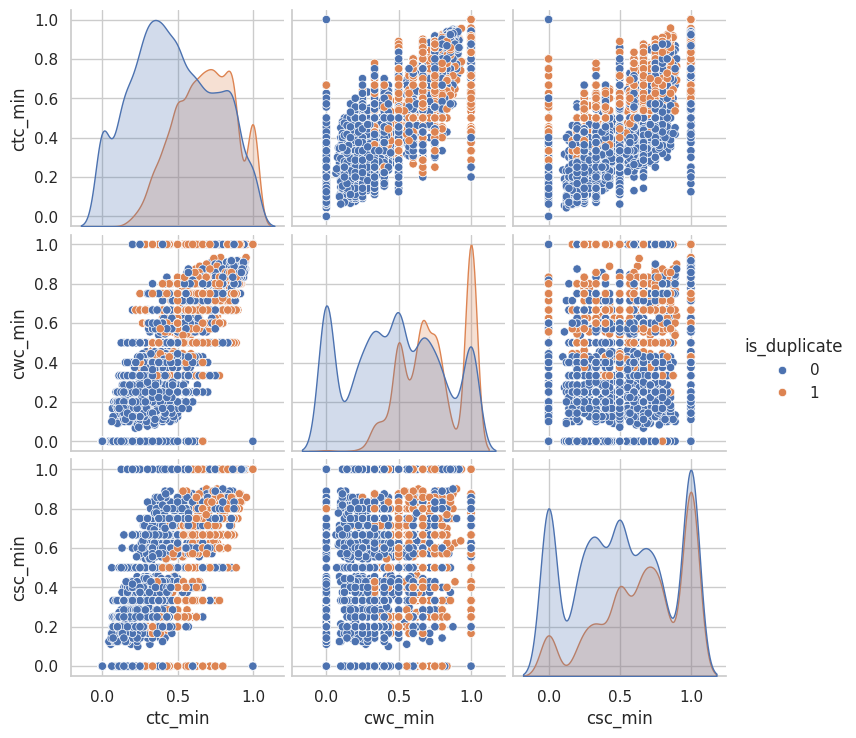

In [250]:
#EDA

sb.pairplot(p_df[['ctc_min', 'cwc_min', 'csc_min', 'is_duplicate']], hue = 'is_duplicate')

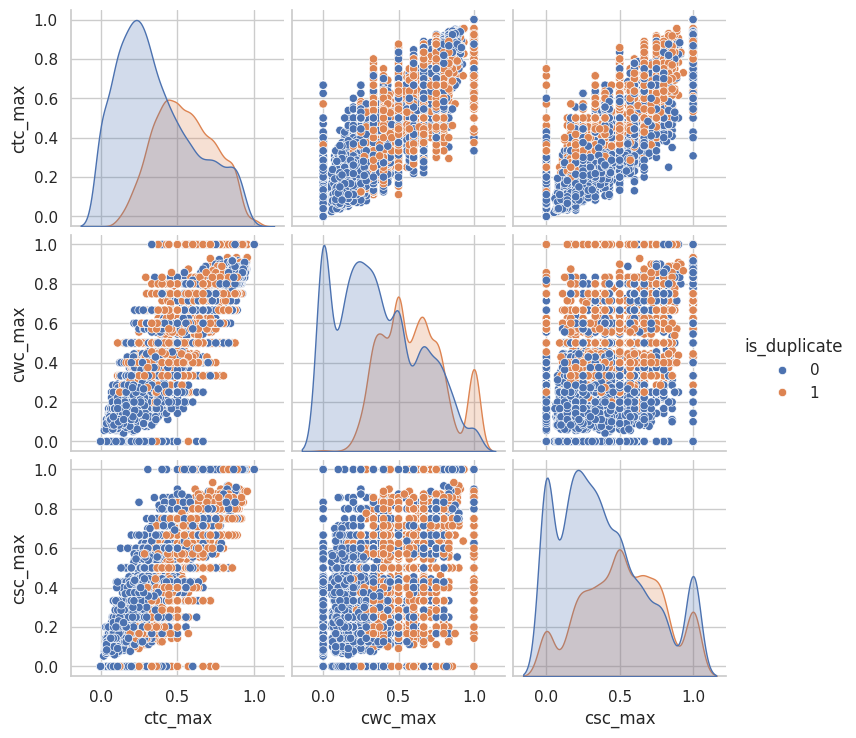

In [251]:
#EDA

sb.pairplot(p_df[['ctc_max', 'cwc_max', 'csc_max', 'is_duplicate']], hue = 'is_duplicate')

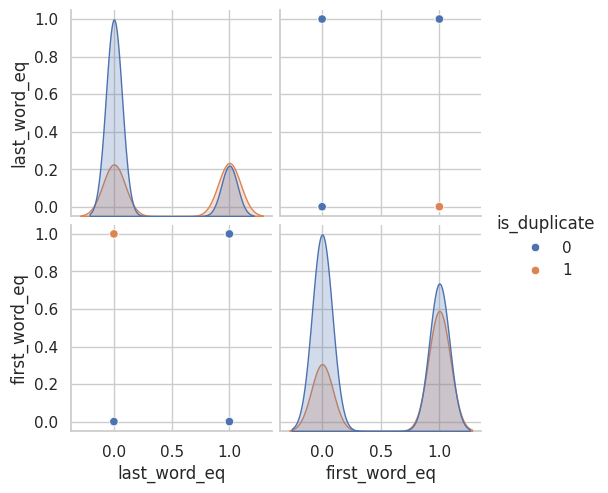

In [252]:
sb.pairplot(p_df[['last_word_eq','first_word_eq','is_duplicate']], hue = 'is_duplicate')

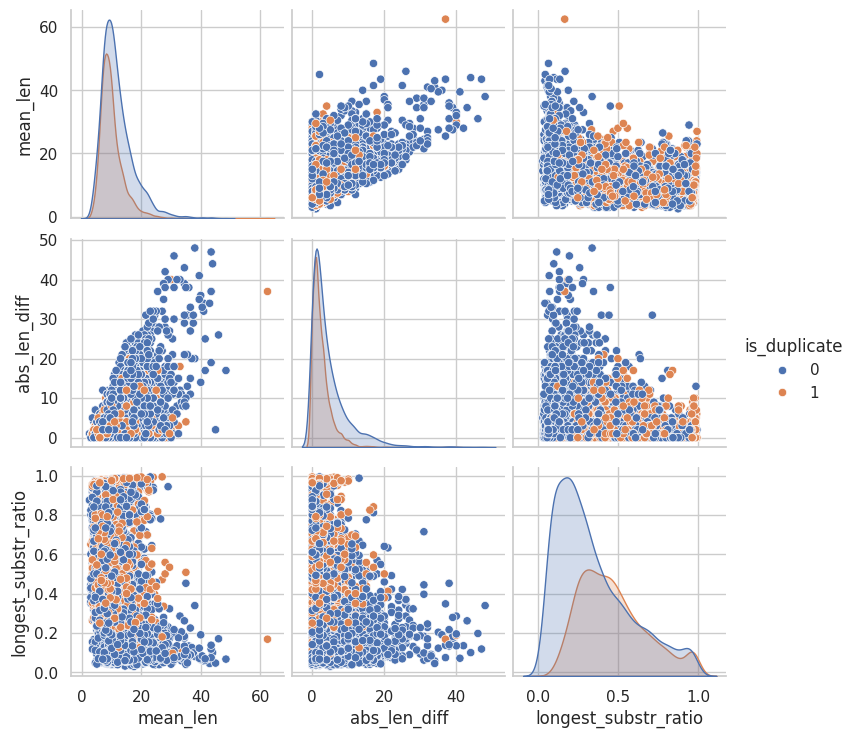

In [253]:
sb.pairplot(p_df[['mean_len','abs_len_diff', 'longest_substr_ratio', 'is_duplicate']], hue = 'is_duplicate')

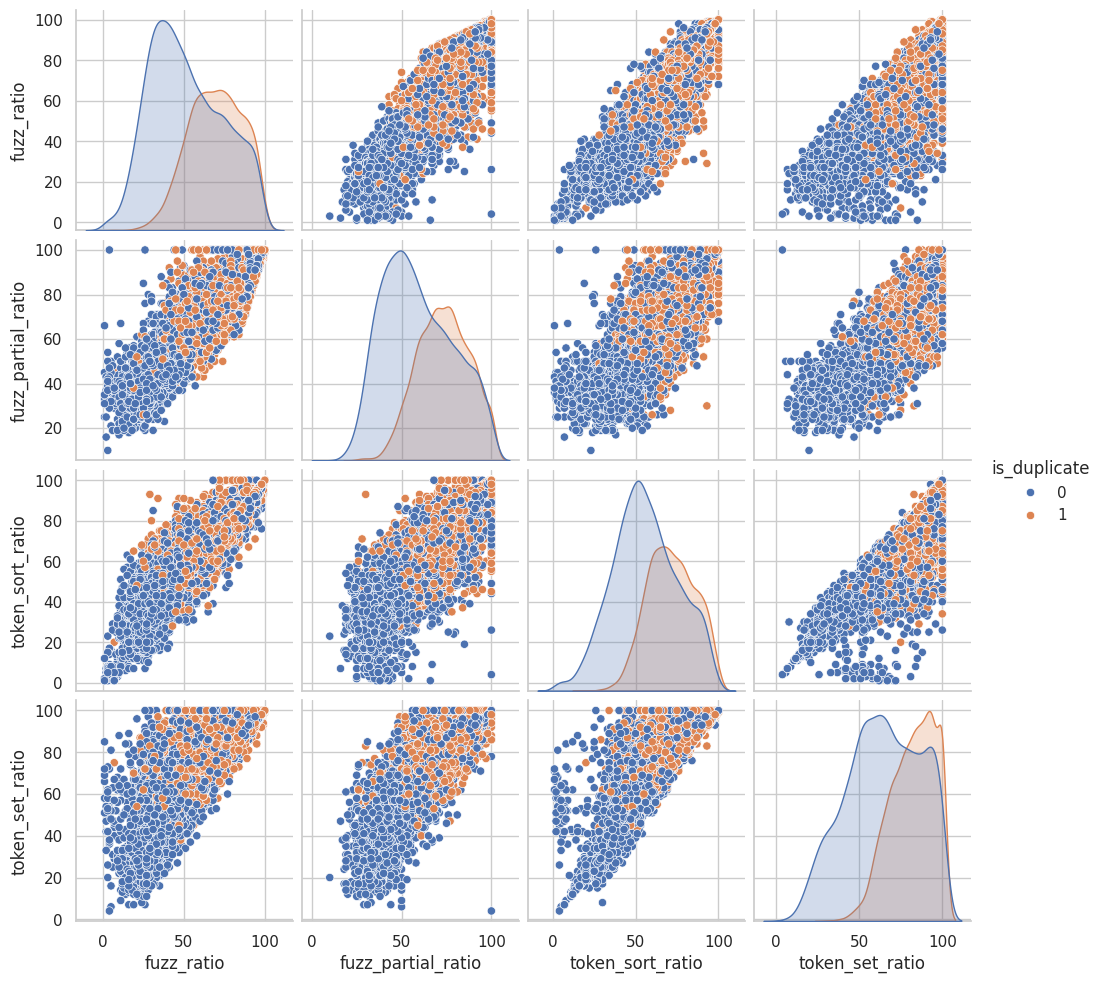

In [254]:
sb.pairplot(p_df[['fuzz_ratio', 'fuzz_partial_ratio','token_sort_ratio','token_set_ratio', 'is_duplicate']], hue = 'is_duplicate')

In [255]:
#Use TSNE for Dimentionality refuction for 15 feature(Generated after cleaning the data) to 3 dimention
from sklearn.preprocessing import MinMaxScaler

In [256]:
x = MinMaxScaler().fit_transform(p_df[['ctc_min', 'cwc_min', 'csc_min','mean_len','abs_len_diff', 'longest_substr_ratio','fuzz_ratio', 'fuzz_partial_ratio','token_sort_ratio', 'token_set_ratio','is_duplicate']])

In [257]:
y = p_df['is_duplicate'].values

In [258]:
from sklearn.manifold import TSNE

In [259]:
tsne2d = TSNE(
    n_components=2,
    init = 'random',#pca
    random_state=101,
    method = 'barnes_hut',
    n_iter = 1000,
    verbose = 2,
    angle =0.5
).fit_transform(x)

/usr/local/lib/python3.12/dist-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 10000 samples in 0.027s...
[t-SNE] Computed neighbors for 10000 samples in 1.077s...
[t-SNE] Computed conditional probabilities for sample 1000 / 10000
[t-SNE] Computed conditional probabilities for sample 2000 / 10000
[t-SNE] Computed conditional probabilities for sample 3000 / 10000
[t-SNE] Computed conditional probabilities for sample 4000 / 10000
[t-SNE] Computed conditional probabilities for sample 5000 / 10000
[t-SNE] Computed conditional probabilities for sample 6000 / 10000
[t-SNE] Computed conditional probabilities for sample 7000 / 10000
[t-SNE] Computed conditional probabilities for sample 8000 / 10000
[t-SNE] Computed conditional probabilities for sample 9000 / 10000
[t-SNE] Computed conditional probabilities for sample 10000 / 10000
[t-SNE] Mean sigma: 0.091896
[t-SNE] Computed conditional probabilities in 0.326s
[t-SNE] Iteration 50: error = 96.6970978, gradient norm = 0.0396362 (50 iterations in 9.062s)
[t-SNE] It

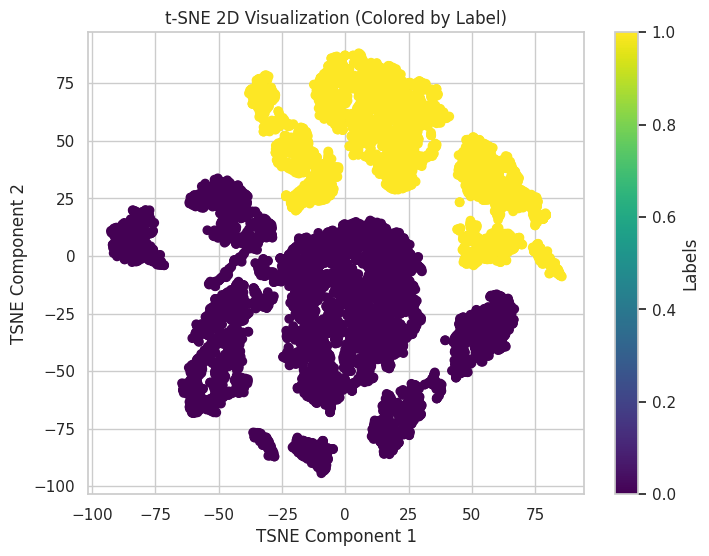

In [260]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
scatter = plt.scatter(tsne2d[:,0], tsne2d[:,1], c=y, cmap='viridis')
plt.title("t-SNE 2D Visualization (Colored by Label)")
plt.xlabel("TSNE Component 1")
plt.ylabel("TSNE Component 2")
plt.colorbar(scatter, label="Labels")
plt.show()


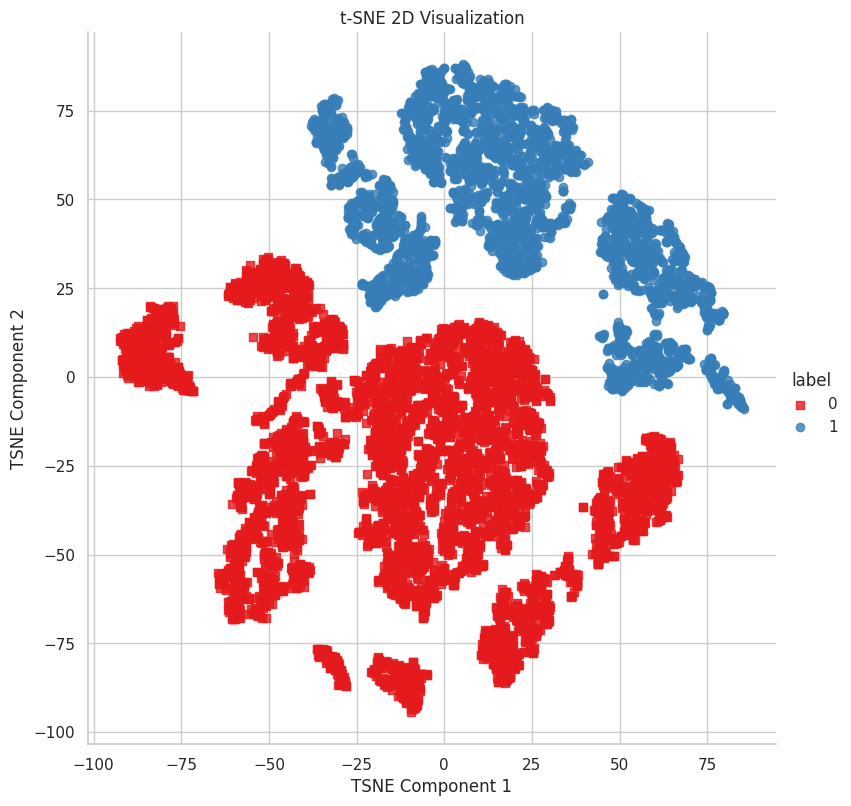

In [261]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Create DataFrame from t-SNE vectors
x_df = pd.DataFrame({
    'x': tsne2d[:, 0],
    'y': tsne2d[:, 1],
    'label': y
})

# Plot using seaborn
sns.set(style="whitegrid")

sns.lmplot(
    data=x_df,
    x='x',
    y='y',
    hue='label',
    fit_reg=False,
    height=8,
    palette="Set1",
    markers=['s', 'o']
)

plt.title("t-SNE 2D Visualization")
plt.xlabel("TSNE Component 1")
plt.ylabel("TSNE Component 2")
plt.show()


In [ ]:
# tsne3d = TSNE(
#     n_components=3,
#     init = 'random',#pca
#     random_state=101,
#     method = 'barnes_hut',
#     n_iter = 1000,
#     verbose = 2,
#     angle =0.5
# ).fit_transform(x)

In [263]:
!pip install plotly

In [ ]:
# import plotly.graph_objs as go
# import plotly.tools as tls
# import plotly.offline as py
# py.init_notebook_mode(connected=True)

# trace1 = go.Scatter3d(
#     x=tsne3d[:,0],
#     y=tsne3d[:,1],
#     z=tsne3d[:,2],
#     mode='markers',
#     marker=dict(
#         sizemode='diameter',
#         color = y,
#         colorscale = 'Portland',
#         colorbar = dict(title = 'duplicate'),
#         line=dict(color='rgb(255, 255, 255)'),
#         opacity=0.75
#     )
# )

# data=[trace1]
# layout=dict(height=800, width=800, title='3d embedding with engineered features')
# fig=dict(data=data, layout=layout)
# py.iplot(fig, filename='3DBubble')

In [264]:
q_df

,question1,question2
9344,"I can't do push-ups, why?",Why can't I do push-ups?
10322,What is a secret which you would not tell anyb...,What is a secret which you would not tell anyb...
244200,What is an IT architect?,What does a c++ architect do?
93563,Are there examples of well-known excellent com...,Are there real life examples of people who are...
380765,What is the best way to prepare for the theore...,What is the best way to prepare for CA final l...
...,...,...
328229,Difference between HRM and International HRm?,How would you explain WiFi to your grandmother?
285822,What is the process to determine the density o...,What is the process to determine the density o...
41153,How has the pace of scientific progress during...,How has the pace of technological progress dur...
45297,How do I code an online Android ide?,What are some good online IDEs which support A...


In [265]:
final_df = p_df.drop(columns= ['id', 'qid1', 'qid2', 'question1', 'question2'])
print(final_df.shape)
final_df.head()

(10000, 25)


,is_duplicate,q1_len,q2_len,q1_num_word,q2_num_word,word_common,word_total,word_share,q1_num_words,q2_num_words,...,ctc_max,last_word_eq,first_word_eq,abs_len_diff,mean_len,longest_substr_ratio,fuzz_ratio,fuzz_partial_ratio,token_sort_ratio,token_set_ratio
9344,1,23,23,5,5,5,10,0.50,5,5,...,0.999980,0,0,0,5.0,0.458333,78,82,100,100
10322,1,62,97,13,19,13,31,0.42,13,19,...,0.684207,0,1,6,16.0,0.984127,78,100,78,100
244200,0,23,36,5,6,2,12,0.17,5,8,...,0.249997,0,1,3,6.5,0.416667,64,61,64,76
93563,0,185,142,27,25,8,49,0.16,27,25,...,0.296295,0,1,2,26.0,0.097902,42,44,52,55
380765,1,77,58,16,13,10,27,0.37,16,13,...,0.624996,0,1,3,14.5,0.610169,68,72,68,86


In [266]:
from sklearn.feature_extraction.text import CountVectorizer

#merge texts

question = list(q_df['question1']) + list(q_df['question2'])

cv = CountVectorizer(max_features=3000)
q1_arr, q2_arr = np.vsplit(cv.fit_transform(question).toarray(), 2)

In [267]:
temp_df1 = pd.DataFrame(q1_arr, index = q_df.index)
temp_df2 = pd.DataFrame(q2_arr, index = q_df.index)
temp_df = pd.concat([temp_df1, temp_df2], axis = 1)
temp_df

,0,1,2,3,4,5,6,7,8,9,...,2990,2991,2992,2993,2994,2995,2996,2997,2998,2999
9344,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10322,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
244200,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
93563,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
380765,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
328229,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,1,0,0,0,0,0
285822,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41153,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
45297,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [268]:
temp_df.shape

(10000, 6000)

In [269]:
# temp_df

In [270]:
total_df = pd.concat([final_df, temp_df], axis = 1)
print(total_df.shape)
total_df.head()

(10000, 6025)


,is_duplicate,q1_len,q2_len,q1_num_word,q2_num_word,word_common,word_total,word_share,q1_num_words,q2_num_words,...,2990,2991,2992,2993,2994,2995,2996,2997,2998,2999
9344,1,23,23,5,5,5,10,0.50,5,5,...,0,0,0,0,0,0,0,0,0,0
10322,1,62,97,13,19,13,31,0.42,13,19,...,0,1,0,0,0,0,0,0,0,0
244200,0,23,36,5,6,2,12,0.17,5,8,...,0,0,0,0,0,0,0,0,0,0
93563,0,185,142,27,25,8,49,0.16,27,25,...,0,0,0,0,0,0,0,0,0,0
380765,1,77,58,16,13,10,27,0.37,16,13,...,0,0,0,0,0,0,0,0,0,0


In [271]:
from sklearn.model_selection import train_test_split

In [272]:
x = total_df.iloc[:,1:]
# x
y = total_df.iloc[:,0]
# y

In [273]:
x_train, x_test, y_train, y_test = train_test_split(x.values, y.values, test_size=0.2, random_state  = 32)

In [274]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

rf = RandomForestClassifier()
rf.fit(x_train, y_train)

RandomForestClassifier()

In [275]:
y_pred = rf.predict(x_test)
accuracy_score(y_test, y_pred)

0.773

In [276]:
from xgboost import XGBClassifier
xgb = XGBClassifier()

xgb.fit(x_train, y_train)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, ...)

In [277]:
y_pred1 = xgb.predict(x_test)
accuracy_score(y_test, y_pred1)


0.787

In [279]:
from sklearn.metrics import confusion_matrix

In [281]:
#for random forest model
confusion_matrix(y_test, y_pred)

array([[1068,  220],
       [ 234,  478]])

In [282]:
#for xgboost model
confusion_matrix(y_test, y_pred1)

array([[1057,  231],
       [ 195,  517]])

In [284]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

In [287]:
lr = LogisticRegression()
lr.fit(x_train, y_train)


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [288]:
y_pred1 = lr.predict(x_test)
accuracy_score(y_test, y_pred1)


0.718

In [290]:
svm = SVC()
svm.fit(x_train, y_train)

SVC()

In [291]:
y_pred1 = lr.predict(x_test)
accuracy_score(y_test, y_pred1)

0.718

In [295]:
def query_point_creator(q1, q2):
  input_query = []

  #preprocess
  q1 = preprocess(q1)
  q2 = preprocess(q2)

  #fetch basic feature
  input_query.append(len(q1))
  input_query.append(len(q2))

  input_query.append(len(q1.split(" ")))
  input_query.append(len(q2.split(" ")))

  input_query.append(common_word(q1, q2))
  input_query.append(total_word(q1, q2))
  input_query.append(round(common_words(q1,q2)/ total_word(q1, q2),2))


  #fetch token feature
  token_feature = fetch_tokens_features(q1, q2)
  input_query.extend(token_feature)


  # fetch fuzzy features
  fuzzy_features = fetch_fuzzy_feature(q1,q2)
  input_query.extend(fuzzy_features)


  # bow feature for q1
  q1_bow = cv.transform([q1]).toarray()

  # bow feature for q2
  q2_bow = cv.transform([q2]).toarray()



  return np.hstack((np.array(input_query).reshape(1,22),q1_bow,q2_bow))






In [296]:
q1 = 'Where is the capital of India?'
q3 = 'Which city serves as the capital of India?'

rf.predict(query_point_creator(q1,q3))

TypeError: common_word() takes 1 positional argument but 2 were given